In [2]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.utils import resample

In [3]:
#Read the dataset
df = pd.read_csv('Station-data-for-ML.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'].astype(object)
df.shape

(49323, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49323 entries, 0 to 49322
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        49323 non-null  object 
 1   station_name    49323 non-null  object 
 2   rain_fall       48067 non-null  float64
 3   temperature     49323 non-null  float64
 4   humidity        49323 non-null  float64
 5   wind_speed      49321 non-null  float64
 6   wind_direction  49323 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.6+ MB


In [5]:
#Check Null Values
df.isnull().sum()

datetime             0
station_name         0
rain_fall         1256
temperature          0
humidity             0
wind_speed           2
wind_direction       0
dtype: int64

In [6]:
#Check Duplicate Values
df.duplicated().sum()

0

In [7]:
#Check unique values
df.nunique()

datetime          16441
station_name          3
rain_fall           525
temperature         244
humidity             56
wind_speed           18
wind_direction      361
dtype: int64

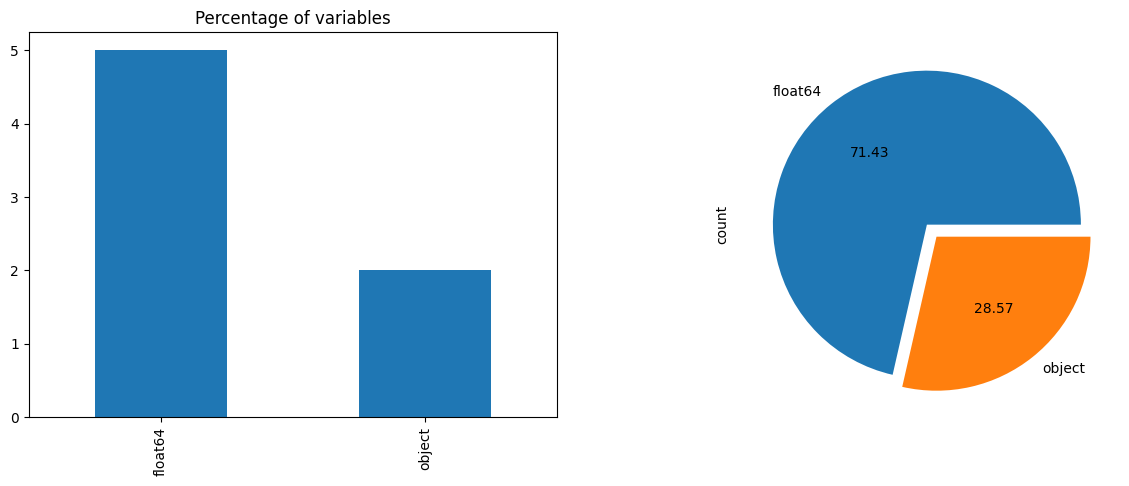

In [8]:
# Percetage of categorical and numerical columns in the dataset
cat_cols = list(df.select_dtypes(include='object').columns)
num_cols = list(df.select_dtypes(exclude='object').columns)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.title('Percentage of variables', loc='center')
df.dtypes.value_counts().plot(kind='bar')

ax2 = plt.subplot(1,2,2)
df.dtypes.value_counts().plot(kind='pie', autopct='%0.2f', ax=ax2, explode=[0,0.1])
plt.show()

In [9]:
print('Categorical columns are :\n', cat_cols)
print()
print('Numerical columns are :\n', num_cols)

Categorical columns are :
 ['datetime', 'station_name']

Numerical columns are :
 ['rain_fall', 'temperature', 'humidity', 'wind_speed', 'wind_direction']


In [11]:
# Converting Date variable into year, month and day columns
df['Year'] = pd.to_datetime(df['datetime']).dt.year
df['Month'] = pd.to_datetime(df['datetime']).dt.month
df['Day'] = pd.to_datetime(df['datetime']).dt.day

In [12]:
# Five point summary for numrerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rain_fall,48067.0,2.663235,9.329759,0.0,0.0,0.0,0.6,371.0
temperature,49323.0,27.130984,4.009831,15.3,24.5,26.8,29.6,40.2
humidity,49323.0,87.820652,8.893067,44.0,83.0,91.0,95.0,100.0
wind_speed,49321.0,2.482046,1.811965,0.0,1.0,2.0,3.0,18.0
wind_direction,49323.0,188.285668,103.487513,0.0,106.0,190.0,287.0,360.0
Year,49323.0,2016.486163,0.499814,2016.0,2016.0,2016.0,2017.0,2017.0
Month,49323.0,6.378383,3.266209,1.0,4.0,6.0,9.0,12.0
Day,49323.0,15.875312,8.778655,1.0,8.0,16.0,23.0,31.0


In [13]:
# Five point summary for categorical variables
df.describe(include='object').T

C:\Users\ntdun\AppData\Local\Temp\ipykernel_6724\700036865.py:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df.describe(include='object').T


,count,unique,top,freq
datetime,49323,16441,2016-01-15 00:00:00,3
station_name,49323,3,QuangNgai,16441


C:\Users\ntdun\AppData\Local\Temp\ipykernel_6724\1454617110.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rain_fall'])


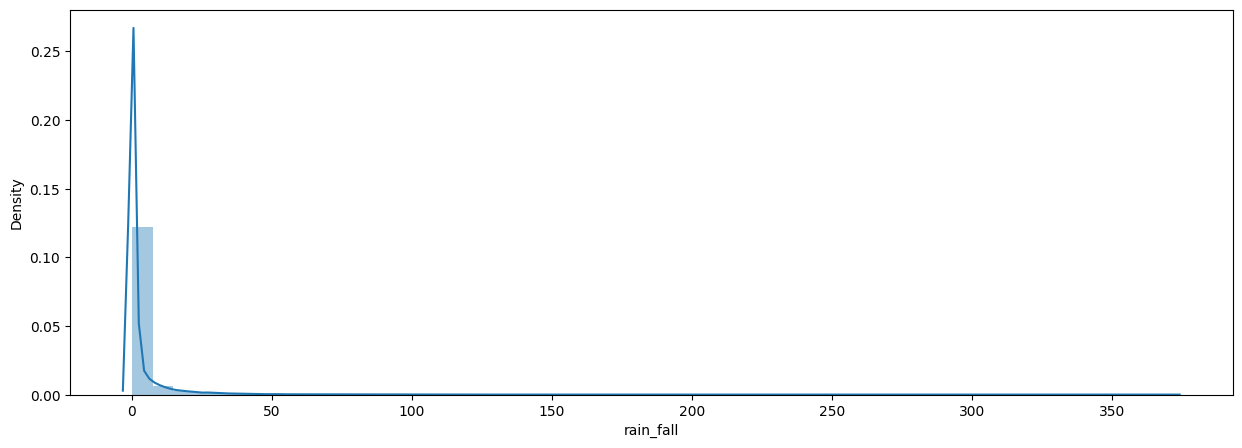

In [17]:
# Distribution of Rainfall
plt.figure(figsize=(15,5))
sns.distplot(df['rain_fall'])
plt.show()

C:\Users\ntdun\AppData\Local\Temp\ipykernel_6724\956943431.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temperature'],  bins=25)


<Axes: title={'center': 'Temperature Distribution'}, xlabel='temperature', ylabel='Density'>

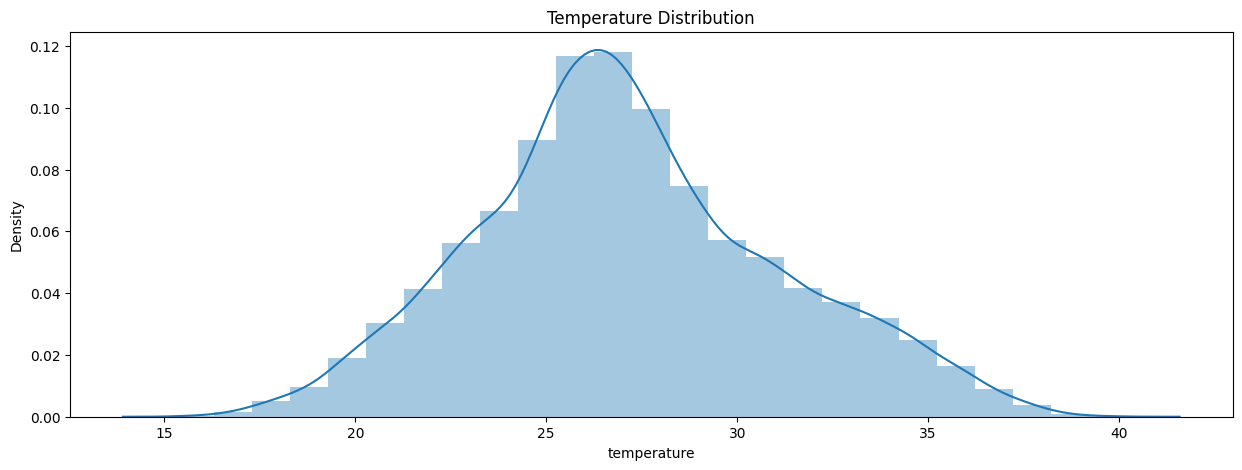

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Temperature Distribution')
sns.distplot(df['temperature'],  bins=25)

C:\Users\ntdun\AppData\Local\Temp\ipykernel_6724\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


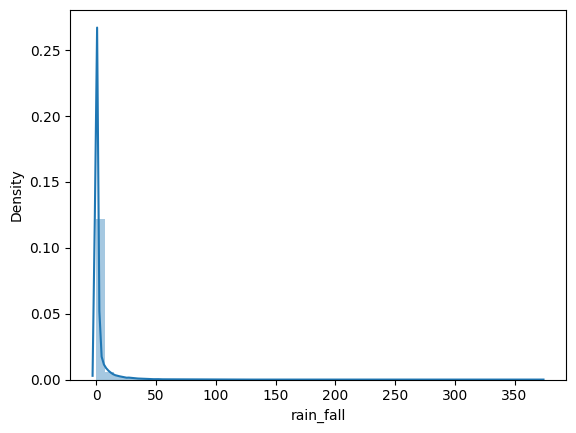

C:\Users\ntdun\AppData\Local\Temp\ipykernel_6724\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


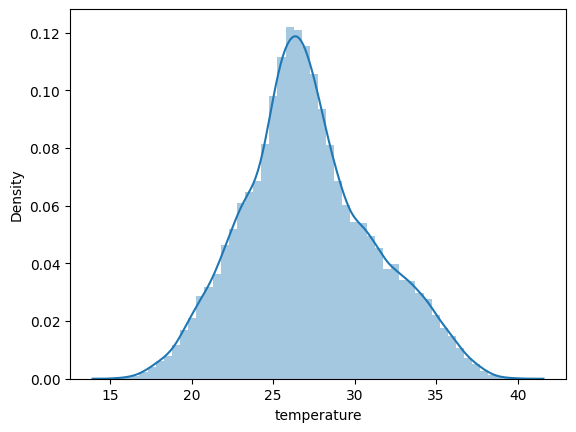

C:\Users\ntdun\AppData\Local\Temp\ipykernel_6724\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


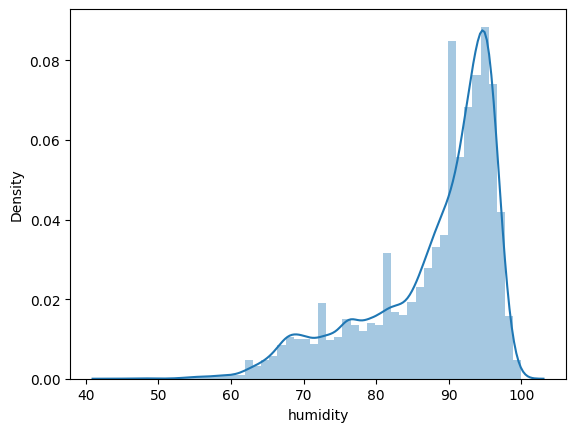

C:\Users\ntdun\AppData\Local\Temp\ipykernel_6724\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


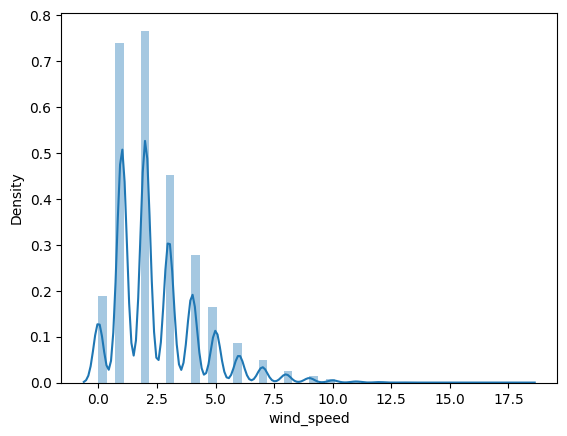

C:\Users\ntdun\AppData\Local\Temp\ipykernel_6724\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


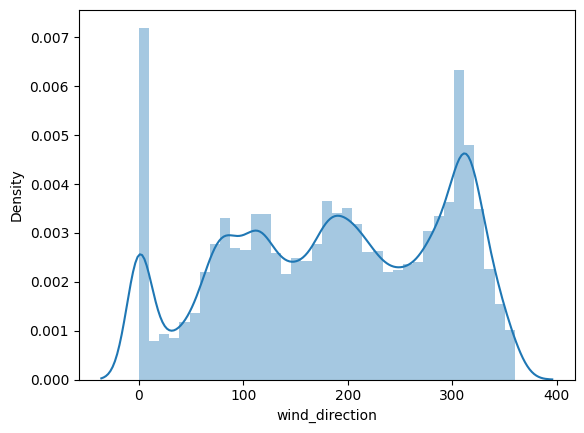

In [35]:
# Distribution plots for numerical variables
for col in num_cols:
    sns.distplot(df[col])
    plt.show()

In [36]:
# Unique locations and its name
print('Unique number of locations are :', len(df['station_name'].unique()))
df['station_name'].unique()

Unique number of locations are : 3


array(['QuangNgai', 'TraKhuc', 'AnChi'], dtype=object)

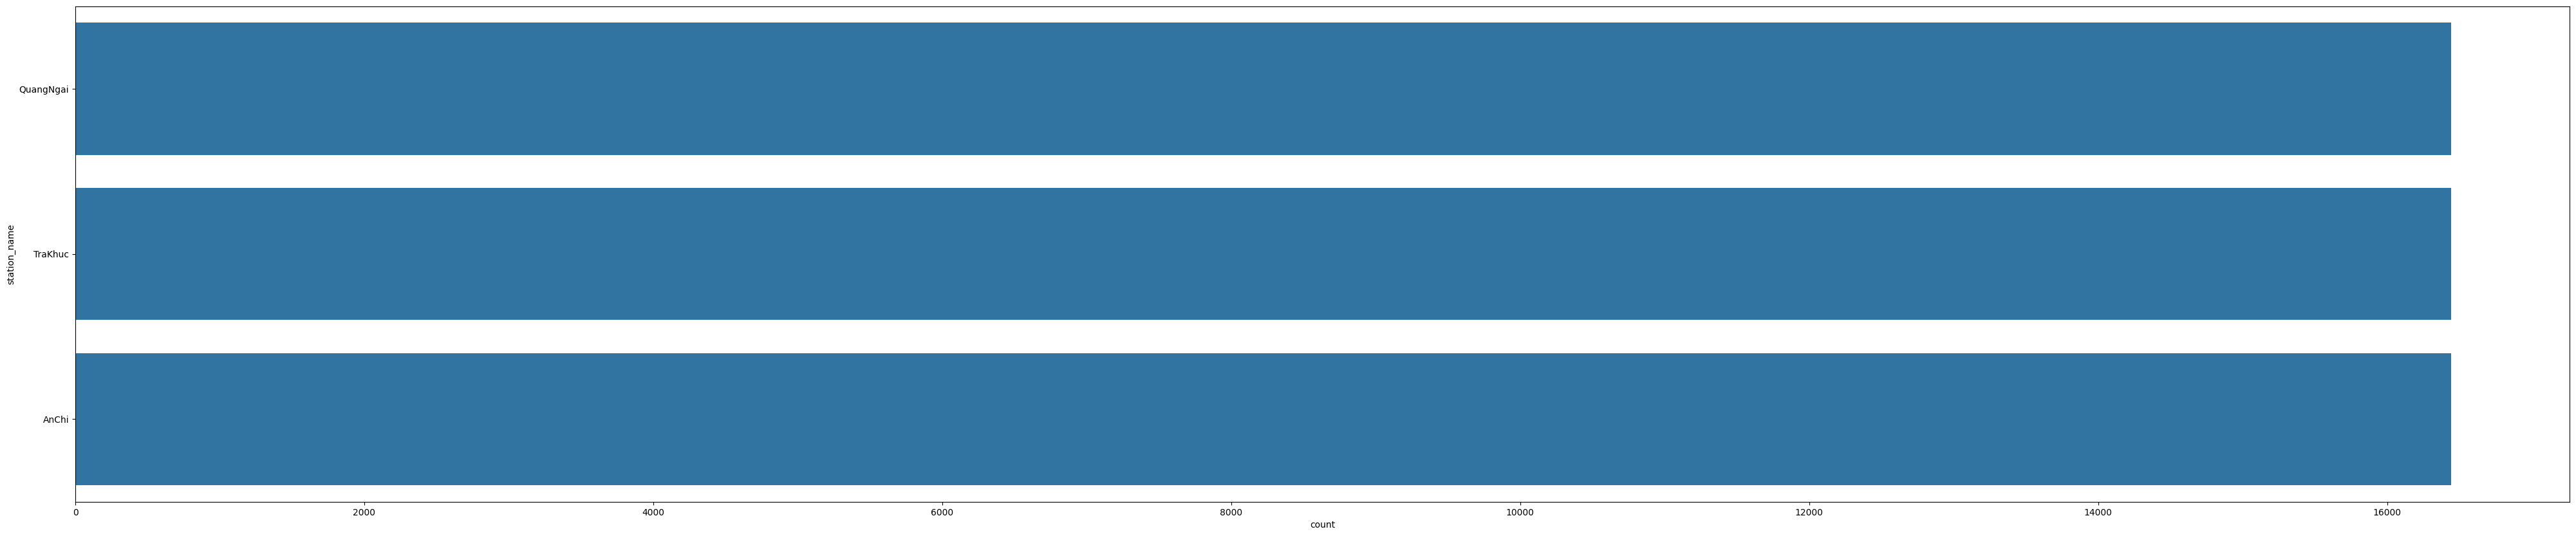

In [50]:
# Number of observations for each location
plt.figure(figsize=(50,10))
sns.countplot(df['station_name'])
plt.show()